## Important Information

- Email: [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
- Office Hours take place in Duke 209 -- [Office Hours Schedule](https://joannabieri.com/schedule.html)
- [Class Website](https://joannabieri.com/data201.html)
- [Syllabus](https://joannabieri.com/data201/IntermediateDataScience.pdf)


In [1]:
# NOTE - This list of package imports is getting long
# In a professional setting you would only want to 
#      import what you need!
# I had chatGPT break the packages into groups here

# ============================================================
# Basic packages
# ============================================================
import os                             # For file and directory operations
import numpy as np                    # For numerical computing and arrays
import pandas as pd                   # For data manipulation and analysis

# ============================================================
# Visualization packages
# ============================================================
import matplotlib.pyplot as plt        # Static 2D plotting
from matplotlib.colors import ListedColormap
import seaborn as sns                  # Statistical data visualization built on matplotlib

# Interactive visualization with Plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = 'colab'        # Set renderer for interactive output in Colab or notebooks

# ============================================================
# Scikit-learn: Core utilities for model building and evaluation
# ============================================================
from sklearn.model_selection import train_test_split    # Train/test data splitting
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler  # Feature transformations and scaling
from sklearn.metrics import (                            # Model evaluation metrics
    mean_squared_error, r2_score, accuracy_score, 
    precision_score, recall_score, confusion_matrix, 
    classification_report
)

# ============================================================
# Scikit-learn: Linear and polynomial models
# ============================================================
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor       # For KNN

# ============================================================
# Scikit-learn: Synthetic dataset generators
# ============================================================
from sklearn.datasets import make_classification, make_regression

# ============================================================
# Scikit-learn: Naive Bayes models
# ============================================================
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# ============================================================
# Scikit-learn: Text feature extraction
# ============================================================
from sklearn.feature_extraction.text import CountVectorizer

# ============================================================
# Scikit-learn: Decision Trees
# ============================================================
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree


from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Introduction to  Dimensionality Reduction

In our last class we saw how decision trees could be used to reduce the number of variables. We were able to rank the importance of the features and then select just the top two best ones. This was an example of dimentionality reduction.

In general, data sets that you see in the real world have higher that 2-3 dimensions. This means that getting an intuitive visualization of the data is very challenging and it can be hard to figure out what combination of features is most important.  

High-dimensional datasets can be challenging because:

- Distances become less meaningful (“curse of dimensionality”)
- Visualization becomes impossible above 3D
- Models may overfit or become computationally expensive

Dimensionality reduction techniques aim to simplify datasets while preserving important structure. They reduce noise, improve visualization, and can help with preprocessing and feature selection.

## Unsupervised Dimensionality Reduction

There are many different ways we might approach dimensionality reduction. We will see two unsupervised examples:

1. Principal Component Analysis (PCA)
2. t-SNE

Remember, unsupervised means that you can use these methods whether or not you have labels for your data. The method does not require labeled data.

NOTE - there are lots of other dimensionality reduction techniques. Check out UMAP (unsupervised) or LDA (supervised)

## PCA: Principal Component Analysis.

PCA (Principal Component Analysis) is a method for simplifying a dataset by creating new features that capture the most important patterns in the data.

We start by assuming we have a centered dataset, meaning that each column (variable) has a mean of zero. So this means that it is really important to do Standard Scalar before applying PCA.

Once we have a centered data set, PCA tries to find a smaller number of new axes (called principal components) that capture the most variation in the data. 

Here are a few things it does:

**Maximum Variance**

PCA finds directions $w$ that maximize variance:

$$
w_1 = \arg\max_{\|w\| = 1} \, \mathrm{Var}(X w)
$$

These directions are the *principal components*.

**Eigenvector View**

In DATA100 we learned about linear algebra and finding eigenvalues! PCA solves the eigenvalue problem:

$$
\Sigma w = \lambda w
$$

where

$$
\Sigma = \frac{1}{n} X^\top X
$$

is the covariance matrix.

- Eigenvectors are directions of maximal variance  
- Eigenvalues capture amount of variance explained by the associated eigenvector. 

## Example Data

Here is an example of some data that will highlight what PCA does.

In [2]:
np.random.seed(42)

# Create 2D data
n = 300
x = np.random.randn(n)
y = np.random.randn(n)

# Create a plane in 3D with some noise
z = 0.5 * x + 2 * y + 0.2 * np.random.randn(n)

X = np.column_stack([x, y, z])
X.shape

(300, 3)

In [3]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [24]:
df = pd.DataFrame({
    "x": X_scaled[:,0],
    "y": X_scaled[:,1],
    "z": X_scaled[:,2],
})

fig = px.scatter_3d(
    df,
    x="x",
    y="y",
    z="z",
    labels={"x": "X-axis", "y": "Y-axis", "z": "Z-axis"}
)

fig.update_traces(marker=dict(size=5, opacity=0.8))
fig.update_layout(
    width=800,
    height=600,
    margin=dict(l=0, r=0, t=40, b=0)
)

fig.show()

If you move this picture around you will see that the data is really spread out in two directions, but not so much in the third. The data is confined to a plane. In fact, if you move the image around you can probably find a view that really flattens out the image and shows the best variation in the data.

This is what PCA does automatically. It tries to find directions that are "most interesting" or that have the most variation. Here we will do PCA and look at the eigenvector/value results.

In [5]:
pca = PCA(n_components=3)
X_3d = pca.fit_transform(X_scaled)

print("Eigenvalues show the variance:", pca.explained_variance_)

Eigenvalues show the variance: [1.98495679 1.01997906 0.00509759]


Here we see that the first eigenvalue is very large and the third is very small.

In [6]:
print("Percent of the variance captured by each value:", pca.explained_variance_ratio_)

Percent of the variance captured by each value: [0.65944676 0.33885971 0.00169353]


So we can look at the associated eigenvalues to see the directions that have the most variance.

In [7]:
pca.components_

array([[ 0.1211353 ,  0.69415052,  0.70956416],
       [ 0.9772325 , -0.20883659,  0.03746902],
       [-0.1741921 , -0.68887033,  0.70364393]])

The eigenvalues and vectors GO TOGETHER!

In [8]:
for a,b in zip(pca.explained_variance_,pca.components_):
    print(f'Eigenvalue: {a}')
    print(f'Associated Eigenvector: {b}')
    print('----------------')

Eigenvalue: 1.9849567941565112
Associated Eigenvector: [0.1211353  0.69415052 0.70956416]
----------------
Eigenvalue: 1.0199790641260167
Associated Eigenvector: [ 0.9772325  -0.20883659  0.03746902]
----------------
Eigenvalue: 0.005097586533523879
Associated Eigenvector: [-0.1741921  -0.68887033  0.70364393]
----------------


### What does this all mean?!?!?

Well this tells me that there is at least one dimension in our data that captures very little of the variance in our data and if we could project our data down onto fewer directions, lined up with the other two eigenvectors we would not lose much information.

## Show me the math!

Suppose our centered dataset is

$$
X = 
\begin{bmatrix}
x_{11} & x_{12} & x_{13} \\
x_{21} & x_{22} & x_{23} \\
\vdots & \vdots & \vdots \\
x_{n1} & x_{n2} & x_{n3} 
\end{bmatrix} \in \mathbb{R}^{n \times 3}
$$

- $n$ = number of samples  
- 3 features (columns)  
- Data is **centered**: each column has mean 0.

From our PCA, the eigenvectors and eigenvalues are:

**PC1** (largest eigenvalue $4.775$):

$$
v_1 = \begin{bmatrix}0.09037764 \\ 0.42565819 \\ 0.90035937 \end{bmatrix}
$$  

**PC2** (second eigenvalue $0.9831$):

$$
v_2 = \begin{bmatrix}0.9722022 \\ -0.23378524 \\ 0.01293624 \end{bmatrix}
$$  

**PC3** (smallest eigenvalue $0.0075$):

$$
v_3 = \begin{bmatrix}0.21599715 \\ 0.87416221 \\ -0.43495478 \end{bmatrix}
$$

To reduce to 2D, we take the top 2 eigenvectors:

$$
W = 
\begin{bmatrix}
0.09037764 & 0.9722022 \\
0.42565819 & -0.23378524 \\
0.90035937 & 0.01293624
\end{bmatrix} \in \mathbb{R}^{3 \times 2}
$$

The 2D representation is:

$$
X_{\text{2D}} = X \cdot W
$$

- $X_{\text{2D}} \in \mathbb{R}^{n \times 2}$  
- First column → coordinate along PC1  
- Second column → coordinate along PC2  

So a matrix multiplication will reduce our data into 2 dimensions!

## PCA from 3 to 2 dimensions

Let's see what sklearn does

In [9]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

print("Eigenvalues show the variance:", pca.explained_variance_ratio_)

Eigenvalues show the variance: [0.82817673 0.170514  ]


Here we have projected down to $n=2$ components, so PCA just keeps the two largest eigenvalues. We can see that these two values capture $0.82817673 + 0.170514 = 0.9986907300000001$ or $99\%$ of the variance. 

We can plot the resulting data, which is stored in the transformed data

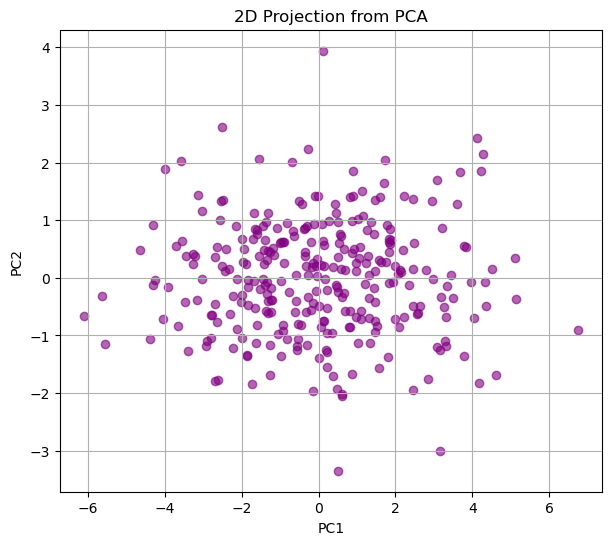

In [10]:
plt.figure(figsize=(7,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c='purple', alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D Projection from PCA")
plt.grid(True)
plt.show()

This picture should match what you did above where you were trying to find the "best view" for the data. 

Now the cool thing about understanding this math is that we can apply PCA to much higher dimensional data, even when we can't plot the original dimensions AND we can interpret the results!!!

## PCA on the Iris Data

In [11]:
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [12]:
X.shape

(150, 4)

In [13]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.92461872 0.05306648 0.01710261 0.00521218]


In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Explained variance ratio:", pca.explained_variance_ratio_)


df = pd.DataFrame({
    "PC1": X_pca[:,0],
    "PC2": X_pca[:,1],
    "type": y.astype(str)
})

fig = px.scatter(
    df,
    x="PC1",
    y="PC2",
    color="type",
    height=500,
    width=500
)

fig.update_traces(marker=dict(size=5))
fig.update_layout(
    title="Iris Data in 2D (PCA)",
    legend_title_text='Type',            # legend title
    legend=dict(
        itemsizing='constant',            # fix spacing
        traceorder="normal"
    ),
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2'
    )
)

fig.show()

Explained variance ratio: [0.92461872 0.05306648]


From the explained variance ratio we can see that the first two Principal components capture more than 97\% of the variance in the data. So it seams reasonable to project our data onto two dimensions. We are able to do this without ever giving PCA our labels. 

Then if we plot the resulting feature space and color by the labels, we can see that we get a really nice separation in the data. 

NOTE: This is a different projection that what we got when we just ignored two dimensions and plotted only the two features labeled as most important by the Decision Tree (a supervised technique).

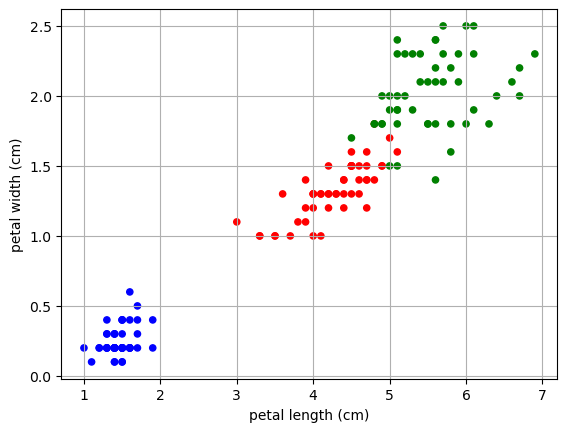

In [15]:
color_map = {0:'blue',1:'red',2:'green'}
colors = [color_map[l] for l in y]
X.plot.scatter(x= 'petal length (cm)',
               y = 'petal width (cm)',
               color = colors)
plt.grid()
plt.show()

## PCA on the famous MNIST data

The MNIST dataset (“Modified National Institute of Standards and Technology”) is a classic benchmark dataset used in machine learning, computer vision, and introductory data science courses.

What it contains
- 70,000 grayscale images of handwritten digits (0–9)
- Each image is 28×28 pixels
- Pixel values range from 0 to 255

Our goal is to see if we can reduce the dimensionality of the data so that the images appear as more clustered in the lower dimension.

### Load the data

In [25]:
from sklearn.datasets import fetch_openml
# Load MNIST from OpenML
mnist = fetch_openml("mnist_784", version=1, as_frame=False)

X = mnist.data.astype("float32")
y = mnist.target.astype("int")

print("MNIST shape:", X.shape)
print("Labels shape:", y.shape)

MNIST shape: (70000, 784)
Labels shape: (70000,)


### Data Reduction

Here we are going to just take a subsample of the data and then do a test train split. This will make a MUCH SMALLER training/testing set, just so our code runs a bit faster!


In [26]:
np.random.seed(42)
idx = np.random.choice(len(X), 10000, replace=False)
X = X[idx]
y = y[idx]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.8,random_state=42)

In [27]:
X_train.shape

(8000, 784)

We have 8000 hand written numbers that are represented as 784 long vectors (or 784 variables) in our training set. Each variable contains numbers between 0-1 to represent the pixel color.

We can view the numbers by reshaping the 784 numbers into a 28X28 image:

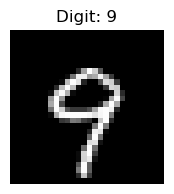

In [28]:
k = 0
image = X_train[k].reshape(28, 28)

plt.figure(figsize=(2,2))
plt.imshow(image, cmap="gray")
plt.title(f"Digit: {y_train[k]}")
plt.axis("off")
plt.show()

Now, the question is: Do we need all 784 dimensions to separate the numbers into groups? How can we visualize this 784 dimensional data?

## Let's try PCA

Now let's see what happens if we try to reduce the dimensionality of the data set. Here will will reduce to 2 dimensions. 

Why 2 dimensions? THIS IS A CHOICE... not a rule. Our data may not be able to be expressed in just two dimensions, but we know we cannot make a visualization in more then three dimensions.

In [30]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

df = pd.DataFrame({
    "PC1": X_pca[:,0],
    "PC2": X_pca[:,1],
    "digit": y_train.astype(str)
})

fig = px.scatter(
    df,
    x="PC1",
    y="PC2",
    color="digit",
    opacity=0.7,
    height=500,
    width=500
)

fig.update_traces(marker=dict(size=2))
fig.update_layout(
    title="MNIST in 3D (PCA)",
    legend_title_text='Digit',            # legend title
    legend=dict(
        itemsizing='constant',            # fix spacing
        traceorder="normal"
    ),
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2'
    )
)

fig.show()

Explained variance ratio: [0.05939008 0.04348005]


What do we see here? We were able to project the data into 2 dimensions and we see some separation of the data. However our projection is only capturing about 1.6\% of the variance in the data. 

We can see some separation when we color by our labels. It seems there is a clear grouping of 1's in our data, but other data points were harder to distinguish.

## PCA is linear and variance-focused

PCA is a linear method: it finds the directions of maximum variance in the data. It tries to preserve global structure: the distances and variance across the entire dataset.

Limitation for MNIST:

- Handwritten digits are nonlinear manifolds: “0” and “6” can look very similar in pixel space, but locally they belong to different clusters.
- PCA cannot separate digits that lie on nonlinear curved manifolds, because it only projects along straight lines.
- Different digits may overlap in 2D or 3D PCA plots.

In [31]:
# How many dimensions would we need to capture 80% of the variance
pca = PCA(n_components=784)
X_pca = pca.fit_transform(X_train_scaled)

exp_var = pca.explained_variance_ratio_

cutoff = 0.8
total = 0
count = 0
for e in exp_var:
    total +=e
    count +=1
    if total >= cutoff:
        print(f'Need {count} features to get {cutoff} variance')
        break

Need 120 features to get 0.8 variance


So you could use these 43 new lower dimensional features to train some other model. Why would you do this.

- Maybe this will make your model more accurate.
- More likely you will have a model that is faster to train without losing much in accuracy.

In [22]:
# Using PCA in preprocessing:

# Do a PCA with the selected number of components
pca = PCA(n_components=43)

# Fit on your training data
X_pca = pca.fit_transform(X_train)
# Transform your testing and validation data
X_pca_test = pca.transform(X_test)

## t-SNE - a great visualization tool

t-SNE (t-distributed Stochastic Neighbor Embedding) is a nonlinear dimensionality reduction method that focuses on preserving local neighborhoods in high-dimensional data.

It starts by defining a similarity score for each pair of points in high dimensional space $x_i$  and $x_j$:

$$
p_{j|i} = \frac{\exp(-\|x_i - x_j\|^2 / 2\sigma_i^2)}{\sum_{k \neq i} \exp(-\|x_i - x_k\|^2 / 2\sigma_i^2)}
$$

- Points that are closer together have a higher probability of being neighbors.  
- $\sigma_i$ is chosen so that each point has roughly the same number of neighbors (this is called perplexity and it is a hyperparameter).

Then it calculates the pairwise probabilities in the high dimensional space:

$$
p_{ij} = \frac{p_{j|i} + p_{i|j}}{2N}
$$

Next it has to convert the probabilities to the lower dimensional space. 

We want the low-dimensional points $y_i$ and $y_j$ to have similar neighbor probabilities to their high dimensional selves. We start by representing the low-dimensional probabilities using a student t-distribution with 1 degree of freedom (heavy-tailed) to compute similarities. The heavy tails prevent cluster crowding

$$
q_{ij} = \frac{(1 + \|y_i - y_j\|^2)^{-1}}{\sum_{k \neq l} (1 + \|y_k - y_l\|^2)^{-1}}
$$

Now we need to force the probabilities to be as similar as possible. We use something called the  Kullback–Leibler (KL) divergence between $P = \{p_{ij}\}$ and $Q = \{q_{ij}\}$

$$
\text{KL}(P \parallel Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}
$$

- If two points are neighbors in high dimensions ($p_{ij}$ large), they should be close in low dimensions ($q_{ij}$ large).  


- Local clusters are preserved: points that were close in high-dimensional space stay together.
- Global distances are less meaningful.
-  t-SNE prioritizes local structure, so clusters may appear separated in exaggerated ways.
- It creates a nonlinear mapping and is very good at visualizing complex clusters.

**t-SNE is not for general preprocessing** since it creates a nonlinear embedding of your data, but does not learn a general mapping. 

It is useful for general unsupervised techniques, like clustering. (coming soon!)

## Apply t-SNE to MNIST

In [23]:
tsne = TSNE(n_components=2, perplexity=40, learning_rate="auto", init="random")
X_tsne = tsne.fit_transform(X_train)

df = pd.DataFrame({
    "TSNE1": X_tsne[:,0],
    "TSNE2": X_tsne[:,1],
    "digit": y_train.astype(str)
})

fig = px.scatter(
    df,
    x="TSNE1",
    y="TSNE2",
    color="digit",
    opacity=0.7,
    height=500,
    width=500
)

fig.update_traces(marker=dict(size=2))
fig.update_layout(
    title="MNIST in 2D (TSNE)",
    legend_title_text='Digit',            # legend title
    legend=dict(
        itemsizing='constant',            # fix spacing
        traceorder="normal"
    ),
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2'
    )
)

fig.show()

Here we can see clear structure in the data where the different digits can be clearly clustered into types.